In [1]:
import numpy as np
import tensorflow as tf
import zfit
# Wrapper for some tensorflow functionality
from zfit import z

print("TensorFlow version:", tf.__version__)

C:\Users\USER\anaconda3\lib\site-packages\zfit\__init__.py:37: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn("TensorFlow warnings are by default suppressed by zfit."
C:\Users\USER\anaconda3\lib\site-packages\zfit\util\execution.py:74: UserWarning: Not running on Linux. Determining available cpus for thread can failand be overestimated. Workaround (only if too many cpus are used):`zfit.run.set_n_cpu(your_cpu_number)`
  warnings.warn("Not running on Linux. Determining available cpus for thread can fail"


TensorFlow version: 2.6.0


In [7]:
import matplotlib.pyplot as plt
import mplhep as hep

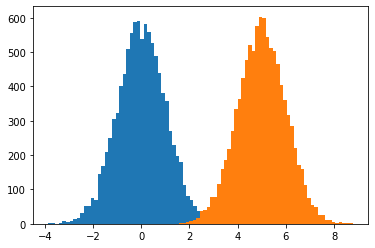

In [3]:
# make pseudo data
mu_true1 = 0
sigma_true1 = 1

mu_true2 = 5
sigma_true2 = 1

data_np1 = np.random.normal(mu_true1, sigma_true1, size=10000)
data_np2 = np.random.normal(mu_true2, sigma_true2, size=10000)

bins=50
plt.hist(data_np1,bins=bins)
plt.hist(data_np2,bins=bins)
plt.show()


In [4]:
def Fit(data_np1,data_np2):
    # define parameters
    obs1  = zfit.Space('x', limits=(-10, 10))
    data1 = zfit.data.Data.from_numpy(obs=obs1, array=data_np1)
    
    obs2  = zfit.Space('x', limits=(-10, 10))
    data2 = zfit.data.Data.from_numpy(obs=obs2, array=data_np2)
    

    mu1    = zfit.Parameter("mu1", 2.4, -1., 5., step_size=0.001)  
    sigma1 = zfit.Parameter("sigma1", 1.3, 0, 5., step_size=0.001)  
    gauss1 = zfit.pdf.Gauss(obs=obs1, mu=mu1, sigma=sigma1)
    
    mu2    = zfit.Parameter("mu2", 2.4, -1., 5., step_size=0.001)  
    sigma2 = zfit.Parameter("sigma2", 1.3, 0, 5., step_size=0.001)  
    gauss2 = zfit.pdf.Gauss(obs=obs2, mu=mu2, sigma=sigma2)
    
    
    # Create the negative log likelihood
    nll1  = zfit.loss.UnbinnedNLL(model=gauss1, data=data1)  # loss
    nll2 = zfit.loss.UnbinnedNLL(model=gauss2, data=data2)  # loss
    
    # Load and instantiate a minimizer
    minimizer1 = zfit.minimize.Minuit()
    minimum1 = minimizer1.minimize(loss=nll1)
    minimizer2 = zfit.minimize.Minuit()
    minimum2 = minimizer1.minimize(loss=nll2)
    
    # Get the fitted values, again by run the variable graphs
    params1 = minimum1.params
    params2 = minimum2.params
    
    print(minimum1)
    print(minimum2)
    return gauss1,gauss2

In [5]:
gauss1,gauss2 = Fit(data_np1,data_np2)

FitResult of
<UnbinnedNLL model=[<zfit.<class 'zfit.models.dist_tfp.Gauss'>  params=[mu1, sigma1]] data=[<zfit.core.data.Data object at 0x0000023618F9DC10>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 7.2e-08 │ -1.64e+04   │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name      value    at limit
------  -------  ----------
mu1     0.01413       False
sigma1    1.006       False
FitResult of
<UnbinnedNLL model=[<zfit.<class 'zfit.models.dist_tfp.Gauss'>  params=[mu2, sigma2]] data=[<zfit.core.data.Data object at 0x0000023618FC4160>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm   

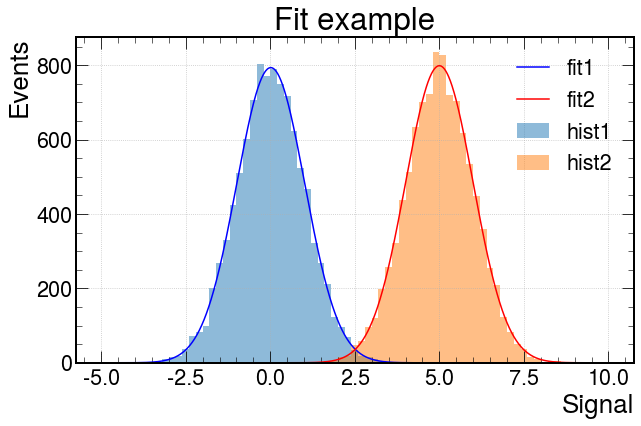

In [14]:
plt.style.use(hep.style.ROOT)
plt.figure(figsize=(10, 6))


n_bins = 50
range_1 = (-5,5)
range_2 = (0,10)


plt.hist(data_np1, bins=n_bins, range=range_1,alpha=0.5,label='hist1')
plt.hist(data_np2, bins=n_bins, range=range_2,alpha=0.5,label='hist2')

x1 = np.linspace(*range_1, num=1000)
x2 = np.linspace(*range_2, num=1000)

with gauss1.set_norm_range(range_1):
    pdf1 = zfit.run(gauss1.pdf(x1))
_ = plt.plot(x1, data_np1.shape[0] / n_bins * (range_1[1] - range_1[0]) * pdf1,c='b',label='fit1')

with gauss2.set_norm_range(range_2):
    pdf2 = zfit.run(gauss2.pdf(x2))
_ = plt.plot(x2, data_np2.shape[0] / n_bins * (range_2[1] - range_2[0]) * pdf2,c='r',label='fit2')

plt.grid(alpha=0.8)
plt.title('Fit example')
plt.xlabel('Signal')
plt.ylabel('Events')
plt.legend()